# Install libraries:

In [ ]:
#install library

%%capture
# Install Twinthttps://github.com/twintproject/twint/issues/1023#issuecomment-726522009
!pip3 install --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
!pip3 install --upgrade aiohttp_socks

# nest_asyncio 
!pip install nest_asyncio

In [ ]:
!pip3 install --upgrade --user git+https://github.com/MarcosFP97/twint.git@origin/master#egg=twint

  Cloning https://github.com/MarcosFP97/twint.git (to revision origin/master) to /tmp/pip-install-xnm7k3ld/twint_356491b26cd5491cbcc861c57d2b2adc
  Running command git clone -q https://github.com/MarcosFP97/twint.git /tmp/pip-install-xnm7k3ld/twint_356491b26cd5491cbcc861c57d2b2adc
  Running command git checkout -q origin/master


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from zipfile import ZipFile
import json
# -*- coding: utf-8 -*-

Mounted at /content/drive


In [ ]:
copied_path = "drive/Shareddrives/capstone_prayap_nithyara/Influencer Brand Dataset/"



In [ ]:
brandsprocessed3 = pd.read_csv('drive/Shareddrives/capstone_prayap_nithyara/brandslistfinal_data.csv')
brandsprocessed=list(brandsprocessed3['0'])
brandsprocessed[:10]

['the original dessert hummus',
 'liketoknowit',
 'jofama  fashion',
 'opullence paris',
 'hellobody italia',
 'keep nature wild',
 'littlewoods',
 'mary kay de mxico oficial',
 'the may fair',
 'evogue']

# Collecting data:

In [ ]:
import twint
import nest_asyncio
import pandas as pd
nest_asyncio.apply()
from datetime import date, timedelta

### Fetch Tweets functions:

In [ ]:
def fetchtweets(sinceDate, untilDate,brands):	
  since = str(sinceDate)
  until = str(untilDate)
  df1=pd.DataFrame()
  i=0
  for brand in brands:
    i=i+1
    try:
      c = twint.Config()
      c.Retries_count = 10
      c.Search = brand
      c.Pandas = True
      c.Since = since
      c.Until = until
      c.User_full = True # also fetching full user profile data.
      c.Lowercase = True
      c.User_full = True
      c.Filter_retweets = True
      c.Lang = "en"
      c.Hide_output = True
      print("* Fetching tweets created for " + since + str(brand))
      print(i)
      twint.run.Search(c)
      #interest_df11.to_csv('interest5_data.csv')
      df = twint.storage.panda.Tweets_df
      df['brand']=brand
      df1=df1.append(df)
      print(len(df))
      print(len(df1))
    except:
      df=pd.DataFrame()
      print("brand_where_it_failed"+ str(brand))
      print(i)
      return(df1)
      exit("failed")
  return(df1)


In [ ]:
# Fetrching tweets between dates
def tweetsbetweendates(beginDate, endDate,brand):
  if (type(beginDate) is not date) | (type(endDate) is not date):
    return print("Error: Please supply `beginDate` and `endDate` in `datetime.date` format.")
  else:
    df=fetchtweets(beginDate, endDate,brand)
    df.to_csv('brandstweets_data1.csv')
    !cp brandstweets_data1.csv "drive/Shareddrives/capstone_prayap_nithyara/twitter2/"

# fetching tweets by date between dates
def ftweetsbydaybetweendates(beginDate, endDate,brand):
  if (type(beginDate) is not date) | (type(endDate) is not date):
    return print("Error: Please supply `beginDate` and `endDate` in `datetime.date` format.")
  else:
    numberOfDays = endDate - beginDate
    df1=pd.DataFrame()
    for d in range(numberOfDays.days):
      start = beginDate + timedelta(days=d)
      end = beginDate + timedelta(days=d+2)
      df=fetchtweets(start, end,brand)
      df1=df1.append(df)
    df1.to_csv('brandstweets_data100.csv')
    !cp brandstweets_data100.csv "drive/Shareddrives/capstone_prayap_nithyara/twitter/"
    print("Fetching complete.")
  return(df1)

## Fetch data:



```
# This is formatted as code
```

### Fetch data by date range 

In [ ]:
beginDate = date(2018, 7, 1)
endDate = date(2018, 9, 30)
tweetsbetweendates(beginDate, endDate,brandsprocessed[1000:2000])

* Fetching tweets created for 2018-07-01blue bell
1
brand_where_it_failedblue bell
1


**TWITTER DATA**

# Combine data in Google Drive project folder:

> Indented block



In [ ]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content/drive/Shareddrives/capstone_prayap_nithyara/twitter': ['brandstweets_data4.csv', 'brandstweets_data5.csv', 'brandstweets_data6.csv', 'brandstweets_data7.csv', 'brandstweets_data8.csv', 'brandstweets_data9.csv', 'brandstweets_data11.csv', 'brandstweets_data10.csv', 'brandstweets_data15.csv', 'brandstweets_data12.csv', 'brandstweets_data16.csv', 'brandstweets_data13.csv', 'brandstweets_data17.csv', 'brandstweets_data25.csv', 'brandstweets_data18.csv', 'brandstweets_data26.csv', 'brandstweets_data19.csv', 'brandstweets_data27.csv', 'brandstweets_data20.csv', 'brandstweets_data28.csv', 'brandstweets_data21.csv', 'brandstweets_data29.csv', 'brandstweets_data22.csv', 'brandstweets_data30.csv', 'brandstweets_data31.csv', 'brandstweets_data33.csv', 'brandstweets_data32.csv', 'brandstweets_data35.csv', 'brandstweets_data34.csv', 'brandstweets_data36.csv', 'unused data']


In [ ]:
import os
import glob
import pandas as pd
copied_path2 = "/content/drive/Shareddrives/capstone_prayap_nithyara/twitter2"

os.chdir(copied_path2)

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f,lineterminator='\n') for f in all_filenames ])
#export to csv
combined_csv.to_csv( "alltweets2.csv", index=False, encoding='utf-8-sig')
!cp alltweets2.csv "/content/drive/Shareddrives/capstone_prayap_nithyara/twitter2"

cp: 'alltweets.csv' and '/content/drive/Shareddrives/capstone_prayap_nithyara/twitter/alltweets.csv' are the same file


In [ ]:
df3=pd.read_csv("/content/drive/Shareddrives/capstone_prayap_nithyara/twitter/alltweets.csv")
df3.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,26,27,32,34,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,brand
0,0,1047206285001678848,1047206285001678848,1538508409000.0,2018-10-02 19:26:49,0.0,"{'type': 'Point', 'coordinates': [40.7391324, ...",Our NEW Pumpkin Pie Dessert Hummus is finding ...,en,['insta'],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,the original dessert hummus
1,0,1076418014587899904,1076418014587899904,1545473028000.0,2018-12-22 10:03:48,0.0,NaN,"Lindstrands Coal neoprene gloves in stock, all...",en,"['jofama', 'jofamafashion', 'lindstrands', 'mx...",...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,jofama fashion
2,1,1074385208714121218,1074385208714121218,1544988369000.0,2018-12-16 19:26:09,0.0,NaN,A winter clothing... ❄️ Shoes: exton_italia Su...,en,[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,jofama fashion
3,2,1070041569305264128,1070041569305264128,1543952765000.0,2018-12-04 19:46:05,0.0,NaN,"""Black total look"" Boots: exton_italia Leathe...",en,[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,jofama fashion
4,3,1052201132880273408,1052201132880273408,1539699273000.0,2018-10-16 14:14:33,0.0,NaN,Have a good day... _____ jofamafashion #jofama...,en,['jofamafashion'],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,jofama fashion


In [ ]:
df3.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'timezone',
       'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id',
       'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest', 'brand'],
      dtype='object')

In [ ]:
df4=df3.groupby(['brand']).size().reset_index()
df4.head()

,brand,0
0,arctic power berries,8
1,axaaa,40
2,a,160
3,a a,160
4,a igrab cafe,2


In [ ]:
df4.rename(columns={0:'total'},inplace=True)


In [ ]:
df4.head()

,brand,total
0,arctic power berries,8
1,axaaa,40
2,a,160
3,a a,160
4,a igrab cafe,2


In [ ]:
df5=df4[df4['total']>200]
df5.head()

,brand,total
88,a r c h,432
105,abc7ny,240
139,acquario di genova,320
402,amour rose,394
409,amys kitchen,240


In [ ]:
len(df4)

9807

In [ ]:
df6=df5.sort_values('total',ascending=False).head(10)
df6

,brand,total
9737,zach king,502
9718,your tea,480
9611,wonderful places,480
4634,kildare village,480
6449,onehope wine,480
8210,stetson,480
4267,jed north apparel,464
6669,partake foods,440
88,a r c h,432
3772,hey honey,400


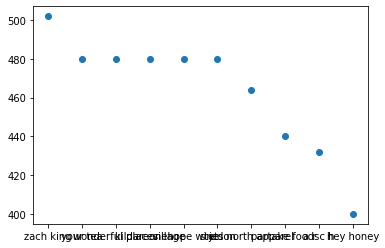

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=df6['brand'],y=df6['total'])
plt.show()

In [ ]:
df3.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'timezone',
       'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id',
       'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest', 'brand'],
      dtype='object')

In [ ]:
df7=df3[['created_at','tweet','hashtags','user_id','user_id_str','username','brand']]

In [ ]:
df7.head()

,created_at,tweet,hashtags,user_id,user_id_str,username,brand
0,1538508409000.0,Our NEW Pumpkin Pie Dessert Hummus is finding ...,['insta'],490989712.0,490989712,hummusandpitaco,the original dessert hummus
1,1545473028000.0,"Lindstrands Coal neoprene gloves in stock, all...","['jofama', 'jofamafashion', 'lindstrands', 'mx...",2860586913.0,2860586913,motoessentials,jofama fashion
2,1544988369000.0,A winter clothing... ❄️ Shoes: exton_italia Su...,[],2932182268.0,2932182268,giopatiti,jofama fashion
3,1543952765000.0,"""Black total look"" Boots: exton_italia Leathe...",[],2932182268.0,2932182268,giopatiti,jofama fashion
4,1539699273000.0,Have a good day... _____ jofamafashion #jofama...,['jofamafashion'],9.72229483167142e+17,972229483167141894,iamguer,jofama fashion


In [ ]:
brandaccounttweets=df7[df7['username']==df7['brand']]
brandaccounttweets.head()

,created_at,tweet,hashtags,user_id,user_id_str,username,brand
774,1546296155000.0,Happy New Year's Eve from the entire Rothy's T...,[],3338568854.0,3338568854,rothys,rothys
781,1546282073000.0,@Ms__Sparkles Ahh! What shoes did you purchase...,[],3338568854.0,3338568854,rothys,rothys
786,1546279716000.0,@WeattheSea Right?? What are your top contenders?,[],3338568854.0,3338568854,rothys,rothys
798,1544571025000.0,Oh @MariahCarey scrolling through you tube cam...,"['whistler', 'novoicecompares']",31228803.0,31228803,queenofnails,queenofnails
801,1542667944000.0,@ZellnerLaw Then what’s up with the battery? W...,[],31228803.0,31228803,queenofnails,queenofnails


In [ ]:
othertweets = pd.DataFrame(df7, index = set(df7.index).difference(set(brandaccounttweets.index))).reset_index()
#othertweets=df7-brandaccounttweets
othertweets.head()

,index,created_at,tweet,hashtags,user_id,user_id_str,username,brand
0,0,1538508409000.0,Our NEW Pumpkin Pie Dessert Hummus is finding ...,['insta'],490989712.0,490989712,hummusandpitaco,the original dessert hummus
1,1,1545473028000.0,"Lindstrands Coal neoprene gloves in stock, all...","['jofama', 'jofamafashion', 'lindstrands', 'mx...",2860586913.0,2860586913,motoessentials,jofama fashion
2,2,1544988369000.0,A winter clothing... ❄️ Shoes: exton_italia Su...,[],2932182268.0,2932182268,giopatiti,jofama fashion
3,3,1543952765000.0,"""Black total look"" Boots: exton_italia Leathe...",[],2932182268.0,2932182268,giopatiti,jofama fashion
4,4,1539699273000.0,Have a good day... _____ jofamafashion #jofama...,['jofamafashion'],9.72229483167142e+17,972229483167141894,iamguer,jofama fashion


In [ ]:
print(len(df7))
print(len(brandaccounttweets))
print(len(othertweets))

2166364
3512
2162852


In [ ]:
brands = pd.read_csv('drive/Shareddrives/capstone_prayap_nithyara/influencers_sponsored_mentioning_brand_merge.csv')
brands.head()

,Unnamed: 0,Account ID,Name,Followers,Followees,Posts,URL,T/F,Category,Bio,E-mail,Phone,Profile pic,Brand Mentions,Brand Sponsored Mentions,Influencers Mentioning Brand,Influencers Sponsored Mentioning Brand
0,0,delightedbydesserthummus,The Original Dessert Hummus\xe2\x84\xa2,47982,2612,1390,http://www.delightedbyhummus.com/,True,Food & Personal Goods,A healthy treat for your sweet-tooth! Made wit...,contact@delightedbyhummus.com,NaN,https://scontent-lax3-1.cdninstagram.com/vp/06...,26.0,3.0,26.0,3.0
1,1,liketoknow.it,LIKEtoKNOW.it,3057208,1506,18984,http://hyperurl.co/agzn0m,True,Personal Goods & General Merchandise Stores,Download the LIKEtoKNOW.it app now to Shop You...,info@liketoknow.it,NaN,https://scontent-lax3-1.cdninstagram.com/vp/c2...,170782.0,7869.0,14632.0,3789.0
2,2,jofamafashion,JOFAMA - Fashion,16942,416,1221,http://www.jofamafashion.com/,True,Personal Goods & General Merchandise Stores,Leather jackets with attitude since 1926. Free...,info@jofama.se,NaN,https://scontent-lax3-1.cdninstagram.com/vp/84...,66.0,8.0,49.0,7.0
3,3,opullenceparis,OPULLENCE PARIS,44553,1714,502,http://www.opullence.com/,True,Personal Goods & General Merchandise Stores,Fabriqu\xc3\xa9e \xc3\xa0 Paris avec amour \xe...,opullenceparis@gmail.com,NaN,https://scontent-lax3-1.cdninstagram.com/vp/25...,44.0,7.0,34.0,5.0
4,4,hellobody_it,HelloBody Italia,164530,173,872,http://www.hellobody.it/shop/,True,Personal Goods & General Merchandise Stores,\xf0\x9f\x8c\xbf Per una cura della pelle e de...,help@hellobody.it,NaN,https://scontent-lax3-1.cdninstagram.com/vp/26...,193.0,24.0,152.0,22.0


In [ ]:
brands1 = pd.read_csv('drive/Shareddrives/capstone_prayap_nithyara/brands_data.csv')

In [ ]:
brands1.head()

,Unnamed: 0,Account ID,Name,Followers,Followees,Posts,URL,T/F,Category,Bio,E-mail,Phone,Profile pic
0,0,delightedbydesserthummus,The Original Dessert Hummus\xe2\x84\xa2,47982,2612,1390,http://www.delightedbyhummus.com/,True,Food & Personal Goods,A healthy treat for your sweet-tooth! Made wit...,contact@delightedbyhummus.com,NaN,https://scontent-lax3-1.cdninstagram.com/vp/06...
1,1,liketoknow.it,LIKEtoKNOW.it,3057208,1506,18984,http://hyperurl.co/agzn0m,True,Personal Goods & General Merchandise Stores,Download the LIKEtoKNOW.it app now to Shop You...,info@liketoknow.it,NaN,https://scontent-lax3-1.cdninstagram.com/vp/c2...
2,2,jofamafashion,JOFAMA - Fashion,16942,416,1221,http://www.jofamafashion.com/,True,Personal Goods & General Merchandise Stores,Leather jackets with attitude since 1926. Free...,info@jofama.se,NaN,https://scontent-lax3-1.cdninstagram.com/vp/84...
3,3,opullenceparis,OPULLENCE PARIS,44553,1714,502,http://www.opullence.com/,True,Personal Goods & General Merchandise Stores,Fabriqu\xc3\xa9e \xc3\xa0 Paris avec amour \xe...,opullenceparis@gmail.com,NaN,https://scontent-lax3-1.cdninstagram.com/vp/25...
4,4,hellobody_it,HelloBody Italia,164530,173,872,http://www.hellobody.it/shop/,True,Personal Goods & General Merchandise Stores,\xf0\x9f\x8c\xbf Per una cura della pelle e de...,help@hellobody.it,NaN,https://scontent-lax3-1.cdninstagram.com/vp/26...


In [ ]:
combined=brands1[['Name','Account ID']]
combined['brand']=brandsprocessed
combined.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Account ID,brand
0,The Original Dessert Hummus\xe2\x84\xa2,delightedbydesserthummus,the original dessert hummus
1,LIKEtoKNOW.it,liketoknow.it,liketoknowit
2,JOFAMA - Fashion,jofamafashion,jofama fashion
3,OPULLENCE PARIS,opullenceparis,opullence paris
4,HelloBody Italia,hellobody_it,hellobody italia


In [ ]:
brand_join=pd.merge(combined,df4,on='brand')

In [ ]:
df4[df4['brand']=='cafeteria']

,brand,total
1458,cafeteria,120


In [ ]:
brand_join2=combined.merge(df4,how='left', left_on='brand', right_on='brand')

In [ ]:
len(brand_join2)

25282

In [ ]:
brand_join2=brand_join2.fillna(0)

In [ ]:
brand_join2[brand_join2.isna().any(axis=1)]

,Name,Account ID,brand,total


In [ ]:
brand_join2=brand_join2[['Name','total']]

In [ ]:

brand_join2.rename(columns={'total':'num_tweets'},inplace=True)

In [ ]:
final=brands.merge(brand_join2,how='left', left_on='Name', right_on='Name')

In [ ]:
final.head()

,Unnamed: 0,Account ID,Name,Followers,Followees,Posts,URL,T/F,Category,Bio,E-mail,Phone,Profile pic,Brand Mentions,Brand Sponsored Mentions,Influencers Mentioning Brand,Influencers Sponsored Mentioning Brand,num_tweets
0,0,delightedbydesserthummus,The Original Dessert Hummus\xe2\x84\xa2,47982,2612,1390,http://www.delightedbyhummus.com/,True,Food & Personal Goods,A healthy treat for your sweet-tooth! Made wit...,contact@delightedbyhummus.com,NaN,https://scontent-lax3-1.cdninstagram.com/vp/06...,26.0,3.0,26.0,3.0,2.0
1,1,liketoknow.it,LIKEtoKNOW.it,3057208,1506,18984,http://hyperurl.co/agzn0m,True,Personal Goods & General Merchandise Stores,Download the LIKEtoKNOW.it app now to Shop You...,info@liketoknow.it,NaN,https://scontent-lax3-1.cdninstagram.com/vp/c2...,170782.0,7869.0,14632.0,3789.0,0.0
2,2,jofamafashion,JOFAMA - Fashion,16942,416,1221,http://www.jofamafashion.com/,True,Personal Goods & General Merchandise Stores,Leather jackets with attitude since 1926. Free...,info@jofama.se,NaN,https://scontent-lax3-1.cdninstagram.com/vp/84...,66.0,8.0,49.0,7.0,10.0
3,3,opullenceparis,OPULLENCE PARIS,44553,1714,502,http://www.opullence.com/,True,Personal Goods & General Merchandise Stores,Fabriqu\xc3\xa9e \xc3\xa0 Paris avec amour \xe...,opullenceparis@gmail.com,NaN,https://scontent-lax3-1.cdninstagram.com/vp/25...,44.0,7.0,34.0,5.0,0.0
4,4,hellobody_it,HelloBody Italia,164530,173,872,http://www.hellobody.it/shop/,True,Personal Goods & General Merchandise Stores,\xf0\x9f\x8c\xbf Per una cura della pelle e de...,help@hellobody.it,NaN,https://scontent-lax3-1.cdninstagram.com/vp/26...,193.0,24.0,152.0,22.0,0.0


In [ ]:

final.to_csv( "influencers_sponsored_mentioning_brand_merge_alltweets.csv", index=False, encoding='utf-8-sig')
!cp influencers_sponsored_mentioning_brand_merge_alltweets.csv "/content/drive/Shareddrives/capstone_prayap_nithyara"

NameError: ignored

#NLP

In [ ]:
post=pd.read_csv('drive/Shareddrives/capstone_prayap_nithyara/post_captions_combined.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
post.head()

,Unnamed: 0,Account ID,Sponsorship Label,Post Caption
0,0,alisasia,0.0,I always post all my going out outfits on Snap...
1,1,alisasia,0.0,@donalovehair 💜💜💜
2,2,alisasia,0.0,@romwe_fashion hoodie jacket
3,3,alisasia,1.0,@kraft_macandcheese takes only 10 min to prepa...
4,4,alisasia,0.0,"“Walkin' around with a bad bitch, she a barbie..."


In [ ]:
len(post)

4153216

In [ ]:
import re
hash = []
def hash_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    #for i in x:
    ht = re.findall(r"#(\w+)", x)
    if ht !=[]:
      hashtags=ht
      totaltags=len(ht)
    else:
      hashtags=[]
      totaltags=0
    return (hashtags,totaltags)
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
post['hashtag']= post['Post Caption'].apply(lambda x: hash_extract(str(x))[0])
post['total_hashtags']=post['Post Caption'].apply(lambda x: hash_extract(str(x))[1])
# # unnesting list
# HT_positive = sum(HT_positive,[])
# HT_positive

In [ ]:
post[['hashtag','total_hashtags']].sort_values(by=['total_hashtags'],ascending=False)

,hashtag,total_hashtags
1419325,"[seasonalsaturdays, thehighlightofyourday, ext...",66
3846729,"[picoftheday, photooftheday, me, girl, italian...",64
2790529,"[breakthegram, wakeupandmakeup, makeupaddict, ...",64
2712018,"[makeup, mua, makeupartist, selftaught, selfta...",62
2624077,"[gelato, icecream, dessert, dessertporn, desse...",62
...,...,...
1851699,[],0
1851700,[],0
1851701,[],0
1851702,[],0


In [ ]:
post.head()

,Unnamed: 0,Account ID,Sponsorship Label,Post Caption,hashtag,total_hashtags
0,0,alisasia,0.0,I always post all my going out outfits on Snap...,[],0
1,1,alisasia,0.0,@donalovehair 💜💜💜,[],0
2,2,alisasia,0.0,@romwe_fashion hoodie jacket,[],0
3,3,alisasia,1.0,@kraft_macandcheese takes only 10 min to prepa...,[ad],1
4,4,alisasia,0.0,"“Walkin' around with a bad bitch, she a barbie...",[],0


In [ ]:
pip install emoji --upgrade

     |████████████████████████████████| 175 kB 27.9 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=5553c65818dde1c89debafc0f02b6d887ab7af0067ccad0f30671cea2d510bd0
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
import emoji
from collections import Counter
post['emoji_text']= post['Post Caption'].apply(lambda x: re.findall(r'(:[!_\-\w]+:)',emoji.demojize(str(x))))
post['emoji']= post['emoji_text'].apply(lambda x: [emoji.emojize(em) for em in x])
post['emoji_counter']=post['emoji'].apply(lambda x: Counter(x))

In [ ]:
post.to_csv( "influencers_posts_emoji_hashtag.csv", index=False, encoding='utf-8-sig')
!cp influencers_posts_emoji_hashtag.csv "/content/drive/Shareddrives/capstone_prayap_nithyara"

In [ ]:
post.head()

,Unnamed: 0,Account ID,Sponsorship Label,Post Caption,hashtag,total_hashtags,emoji_text,emoji,emoji_counter
0,0,alisasia,0.0,I always post all my going out outfits on Snap...,[],0,[:hourglass_done:],[⌛],{'⌛': 1}
1,1,alisasia,0.0,@donalovehair 💜💜💜,[],0,"[:purple_heart:, :purple_heart:, :purple_heart:]","[💜, 💜, 💜]",{'💜': 3}
2,2,alisasia,0.0,@romwe_fashion hoodie jacket,[],0,[],[],{}
3,3,alisasia,1.0,@kraft_macandcheese takes only 10 min to prepa...,[ad],1,[],[],{}
4,4,alisasia,0.0,"“Walkin' around with a bad bitch, she a barbie...",[],0,[:face_with_tears_of_joy:],[😂],{'😂': 1}


In [ ]:
brands = pd.read_csv('drive/Shareddrives/capstone_prayap_nithyara/Brand Metrics/brand_mention_merge.csv')

In [ ]:
brands.head()

,Unnamed: 0,Unnamed: 0.1,Account ID,Name,Followers,Followees,Posts,URL,T/F,Category,Bio,E-mail,Phone,Profile pic,username,count
0,0,0,delightedbydesserthummus,The Original Dessert Hummus\xe2\x84\xa2,47982,2612,1390,http://www.delightedbyhummus.com/,True,Food & Personal Goods,A healthy treat for your sweet-tooth! Made wit...,contact@delightedbyhummus.com,NaN,https://scontent-lax3-1.cdninstagram.com/vp/06...,delightedbydesserthummus,26.0
1,1,1,liketoknow.it,LIKEtoKNOW.it,3057208,1506,18984,http://hyperurl.co/agzn0m,True,Personal Goods & General Merchandise Stores,Download the LIKEtoKNOW.it app now to Shop You...,info@liketoknow.it,NaN,https://scontent-lax3-1.cdninstagram.com/vp/c2...,liketoknow.it,170782.0
2,2,2,jofamafashion,JOFAMA - Fashion,16942,416,1221,http://www.jofamafashion.com/,True,Personal Goods & General Merchandise Stores,Leather jackets with attitude since 1926. Free...,info@jofama.se,NaN,https://scontent-lax3-1.cdninstagram.com/vp/84...,jofamafashion,66.0
3,3,3,opullenceparis,OPULLENCE PARIS,44553,1714,502,http://www.opullence.com/,True,Personal Goods & General Merchandise Stores,Fabriqu\xc3\xa9e \xc3\xa0 Paris avec amour \xe...,opullenceparis@gmail.com,NaN,https://scontent-lax3-1.cdninstagram.com/vp/25...,opullenceparis,44.0
4,4,4,hellobody_it,HelloBody Italia,164530,173,872,http://www.hellobody.it/shop/,True,Personal Goods & General Merchandise Stores,\xf0\x9f\x8c\xbf Per una cura della pelle e de...,help@hellobody.it,NaN,https://scontent-lax3-1.cdninstagram.com/vp/26...,hellobody_it,193.0


In [ ]:
brands2=pd.read_csv('drive/Shareddrives/capstone_prayap_nithyara/Brand Metrics/brand_mentions_by_influencer_merge.csv')

In [ ]:
brands2

,Unnamed: 0,Account ID,Name,Followers,Followees,Posts,URL,T/F,Category,Bio,E-mail,Phone,Profile pic,Brand Mentioning Posts
0,0,fodmap_friendly_eating,FODMAP Friendly Eating,11299.0,2609.0,549.0,https://fodmapfriendlyeating.wordpress.com/,True,Creators & Celebrities,Delicious FODMAP Friendly recipes from @antoni...,tonidaroza@hotmail.co.uk,NaN,https://scontent-lax3-1.cdninstagram.com/vp/e4...,11.0
1,1,paileaa,paige leanne,12615.0,1207.0,1386.0,https://paileaa.com/2018/10/08/that-last-bit-o...,True,Creators & Celebrities,London | positive vibes & good times p.goodes...,p.goodes@hotmail.co.uk,NaN,https://scontent-lax3-1.cdninstagram.com/vp/b4...,65.0
2,2,a12team,A12 Team,1319.0,861.0,405.0,http://www.a12.com.pl/,True,Food & Personal Goods,Photography & Production services \xf0\x9f\x9...,info@a12.com.pl,4.850997e+10,https://scontent-lax3-1.cdninstagram.com/vp/f7...,10.0
3,3,ilbulgaro89,Andrea Paesetti,1547.0,909.0,1250.0,http://youtube.com/c/SpazioiTechItalia,True,Creators & Celebrities,Italian -- #Technology addicted -- Editor & Re...,andrea.paesetti@outlook.com,NaN,https://scontent-lax3-1.cdninstagram.com/vp/da...,1.0
4,4,joililikoi,Joie Lee Ruggiero,7427.0,1836.0,908.0,http://wearehaumea.com/retreats,False,NaN,HI / LA | I seek to inspire and be inspired ...,NaN,NaN,https://scontent-lax3-1.cdninstagram.com/vp/c1...,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38108,38108,elena_280614,Elena,41870.0,1430.0,1058.0,NaN,True,Creators & Celebrities,I'm just a 17 y/o italian self-taught artist. ...,destefanoelena@outlook.it,NaN,https://scontent-lax3-1.cdninstagram.com/vp/16...,133.0
38109,38109,carolefua,C A R O L E \xf0\x9f\x91\x91,11872.0,683.0,125.0,https://m.facebook.com/Makeupbycarolefua/,True,Creators & Celebrities,\xf0\x9f\x87\xb5\xf0\x9f\x87\xad / MUA / \xf0\...,carolefua19@gmail.com,NaN,https://scontent-lax3-1.cdninstagram.com/vp/a9...,40.0
38110,38110,castyworld,Roberto Sikora,5645.0,800.0,389.0,https://youtu.be/6qGKCO1JOIE,True,General Interest,Discovering & Learning\xe2\x9a\xa1\xef\xb8\x8f...,castyworld@outlook.com,NaN,https://scontent-lax3-1.cdninstagram.com/vp/bd...,13.0
38111,38111,urbaine_city,Urbaine City,1323.0,901.0,932.0,https://urbainecity.com/mtlatable-restaurants-...,True,Publishers,"Blogueuse & r\xc3\xa9dactrice pigiste, consult...",marie@urbainecity.com,NaN,https://scontent-lax3-1.cdninstagram.com/vp/b8...,32.0


In [ ]:
brands1=brands[['Account ID','Followers','Followees','Posts','Brand Mentioning Posts']]

In [ ]:
brands1.head()

,Account ID,Followers,Followees,Posts,Brand Mentioning Posts
0,fodmap_friendly_eating,11299.0,2609.0,549.0,11.0
1,paileaa,12615.0,1207.0,1386.0,65.0
2,a12team,1319.0,861.0,405.0,10.0
3,ilbulgaro89,1547.0,909.0,1250.0,1.0
4,joililikoi,7427.0,1836.0,908.0,12.0


In [ ]:
brands1.to_csv( "brandmodel_input2.csv", index=False, encoding='utf-8-sig')
!cp brandmodel_input2.csv "/content/drive/Shareddrives/capstone_prayap_nithyara/models"